In [1]:
from sksurv.datasets import load_veterans_lung_cancer

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sksurv.ensemble import RandomSurvivalForest
set_config(display="text")  # displays text representation of estimators
import seaborn as sns

# % matplotlib inline

In [3]:
print("Hello World")

Hello World


In [36]:
# 1.read data
df = pd.read_excel('C:/Users/Joyce/Downloads/breastcancer3.xlsx')
df.head(10)

df2 = pd.read_excel('C:/Users/Joyce/Desktop/0.DATA/new_data/trimmed_bc_dummary.xlsx')
df2.head(10)

,YDIAG,SIZE,GRADE,NODES,extent,n_surgery,N_radiotherapy,N_chemotherapy,ws_er,ws_pr,...,grade2,grade3,extent0,extent1,extent9,NODES0,NODES1,her2_0,her2_1,mpn_group
0,1958,.,.,.,.,NaN,NaN,NaN,.,.,...,0,0,0,0,0,0,0,0,0,NaN
1,1959,.,.,.,.,NaN,NaN,NaN,.,.,...,0,0,0,0,0,0,0,0,0,NaN
2,1958,.,.,.,.,NaN,NaN,NaN,.,.,...,0,0,0,0,0,0,0,0,0,NaN
3,1962,.,.,.,.,NaN,NaN,NaN,.,.,...,0,0,0,0,0,0,0,0,0,NaN
4,1959,.,.,.,.,NaN,NaN,NaN,.,.,...,0,0,0,0,0,0,0,0,0,NaN
5,1961,.,.,.,.,NaN,NaN,NaN,.,.,...,0,0,0,0,0,0,0,0,0,NaN
6,1964,.,.,.,.,NaN,NaN,NaN,.,.,...,0,0,0,0,0,0,0,0,0,NaN
7,1959,.,.,.,.,NaN,NaN,NaN,.,.,...,0,0,0,0,0,0,0,0,0,NaN
8,1958,.,.,.,.,NaN,NaN,NaN,.,.,...,0,0,0,0,0,0,0,0,0,NaN
9,1964,.,.,.,.,NaN,NaN,NaN,.,.,...,0,0,0,0,0,0,0,0,0,NaN


In [34]:
df2.describe()

,YDIAG,nbcd,diaage,nstime,ws_er0,ws_er1,ws_pr0,ws_pr1,ws_basal0,ws_basal1,...,grade2,grade3,extent0,extent1,extent9,NODES0,NODES1,her2_0,her2_1,mpn_group
count,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,...,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,480.000000
mean,1975.035242,0.394874,73.508210,7.427336,0.004405,0.017221,0.010012,0.011614,0.005607,0.002002,...,0.110533,0.109331,0.005607,0.003604,0.022827,0.136964,0.091310,0.010412,0.001201,1.145833
std,10.438750,0.488921,9.773929,7.540587,0.066239,0.130119,0.099578,0.107162,0.074683,0.044712,...,0.313615,0.312117,0.074683,0.059940,0.149383,0.343879,0.288107,0.101529,0.034648,0.392497
min,1958.000000,0.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1966.000000,0.000000,67.000000,1.834400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1975.000000,0.000000,74.000000,4.917200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1982.000000,1.000000,80.000000,10.896600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2007.000000,1.000000,102.000000,50.628300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [65]:
df2.groupby(["mpn_group"]).size().reset_index(name="次數")

,mpn_group,次數
0,1.0,417
1,2.0,56
2,3.0,7


## Group AAB (MPN = 1,2,3,5,12)

In [40]:
# 1.1 subset by group -- AAB 
# please give up the variable ws_ki67c

fliter = (df2["mpn_group"] == 1)
# group1 = df2[df.columns[~df.columns.isin(['ws_ki67c', 'n_surgery', 'N_radiotherapy', 'N_chemotherapy','GRADE', 'NODES', 'extent', 'ws_er', 'ws_pr', 'ws_basal', 'ws_ecadherin', 'ws_lvi', 'her2'])]]
group1 = df2[fliter].drop(['ws_ki67c', 'ws_ki67', 'n_surgery', 'N_radiotherapy', 'N_chemotherapy','GRADE', 'NODES', 'extent', 'ws_er', 'ws_pr', 'ws_basal', 'ws_ecadherin', 'ws_lvi', 'her2'], axis = 1)
group1 = group1.replace('.', np.nan)
group1.head(10)

,YDIAG,SIZE,nbcd,mpn,diaage,detect,nstime,cis2,ws_er0,ws_er1,...,grade2,grade3,extent0,extent1,extent9,NODES0,NODES1,her2_0,her2_1,mpn_group
1114,1982,NaN,0,1,81,9,3.9754,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1131,1998,NaN,0,2,96,9,1.4045,NaN,0,0,...,0,0,0,0,1,0,0,0,0,1.0
1149,1997,NaN,0,2,95,9,5.5825,NaN,0,0,...,0,0,0,0,1,0,0,0,0,1.0
1195,1981,16.0,0,12,78,1,6.1656,0.0,0,0,...,0,1,0,0,0,1,0,0,0,1.0
1209,1985,NaN,0,1,83,9,12.2710,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1211,1979,15.0,0,12,76,3,13.0240,0.0,0,0,...,1,0,0,0,0,1,0,0,0,1.0
1214,1978,25.0,0,12,75,1,18.3190,0.0,0,0,...,1,0,0,0,0,1,0,0,0,1.0
1238,1983,30.0,0,12,79,9,4.8925,0.0,0,0,...,0,0,0,0,0,1,0,0,0,1.0
1253,1981,99.0,1,12,78,4,0.0137,0.0,0,0,...,0,1,0,0,0,0,1,0,0,1.0
1282,1984,20.0,1,12,80,9,4.7283,0.0,0,0,...,0,0,0,0,0,0,1,0,0,1.0


In [41]:
# 2.data management

# 分feature(x), output(y)
from sksurv.datasets import get_x_y
group1_aab=group1.dropna()
xdata, ydata = get_x_y(group1_aab, attr_labels=['nbcd','nstime'], pos_label=True)
print(xdata)
print(ydata)

      YDIAG  SIZE  mpn  diaage  detect  cis2  ws_er0  ws_er1  ws_pr0  ws_pr1  \
1195   1981  16.0   12      78       1   0.0       0       0       0       0   
1211   1979  15.0   12      76       3   0.0       0       0       0       0   
1214   1978  25.0   12      75       1   0.0       0       0       0       0   
1238   1983  30.0   12      79       9   0.0       0       0       0       0   
1253   1981  99.0   12      78       4   0.0       0       0       0       0   
...     ...   ...  ...     ...     ...   ...     ...     ...     ...     ...   
2486   1984  23.0   12      72       1   0.0       0       0       0       0   
2487   2004  35.0    2      91       9   0.0       0       1       1       0   
2492   1982  20.0   12      69       1   0.0       0       0       0       0   
2493   1978  10.0    1      65       1   0.0       0       0       0       0   
2494   2000  21.0    1      87       9   0.0       0       1       0       1   

      ...  grade2  grade3  extent0  ext

In [42]:
# 3.splitting the data

## random_state = seed
## test_size = test data %
random_state = 20221115
x_train, x_test, y_train, y_test = train_test_split(xdata,ydata, test_size=0.25, random_state=random_state)

In [43]:
# 4.Random survival forest training
# only trainning
rsf = RandomSurvivalForest(n_estimators=100,
                           min_samples_split=10,
                           min_samples_leaf=15,
                           n_jobs=-1,
                           random_state=random_state)
rsf.fit(x_train, y_train)

RandomSurvivalForest(min_samples_leaf=15, min_samples_split=10, n_jobs=-1,
                     random_state=20221115)

In [44]:

# 5.Variable importance : find the most i
from sklearn.inspection import permutation_importance
result = permutation_importance(rsf, x_test, y_test, n_repeats=15, random_state=random_state)
pd.DataFrame({k: result[k] for k in ("importances_mean", "importances_std",)},index=x_test.columns).sort_values(by="importances_mean", ascending=False)


,importances_mean,importances_std
SIZE,0.092920,0.026999
grade3,0.026764,0.016651
NODES1,0.023017,0.014204
detect,0.010414,0.013745
mpn,0.005353,0.003738
diaage,0.004428,0.003056
grade2,0.004282,0.003643
mpn2,0.003309,0.002844
detect9,0.002774,0.005979
ws_er1,0.001217,0.000510


In [45]:
# 6.Random survival forest prediction
rsf.score(x_test, y_test)

0.8218978102189781

In [46]:
# 7.draw the predicted survival for all patients
x_test_sorted = x_test.sort_values(by=["SIZE", "mpn"])
pd.Series(rsf.predict(x_test_sorted))
surv = rsf.predict_survival_function(x_test_sorted, return_array=True)

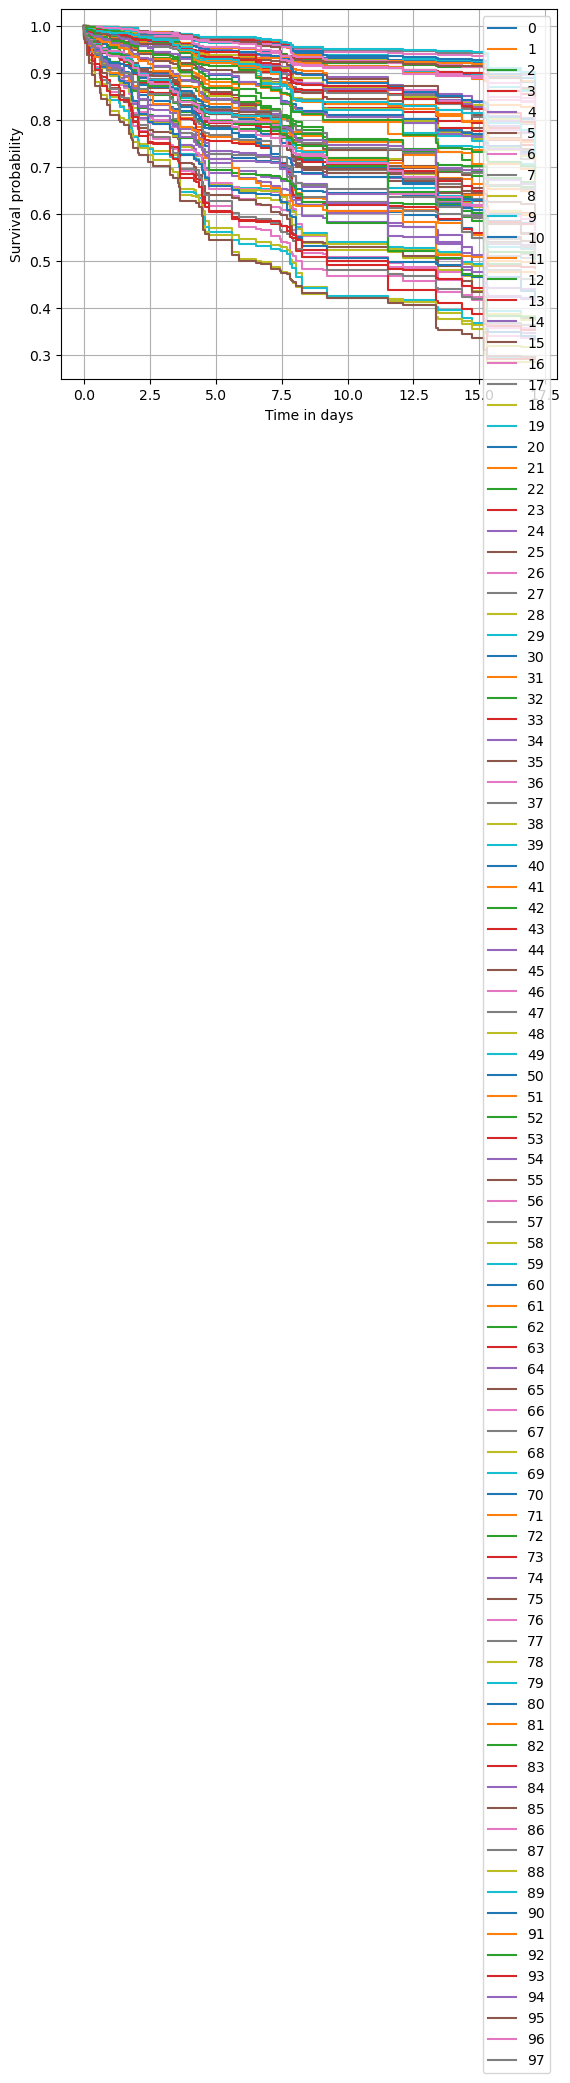

In [47]:

for i, s in enumerate(surv):
    plt.step(rsf.event_times_, s, where="post", label=str(i))
    plt.ylabel("Survival probability")
    plt.xlabel("Time in days")
    plt.legend()
    plt.grid(True)

## Group DAB (MPN = 4)

In [48]:
# 1.1 subset by group -- AAB 
# please give up the variable ws_ki67c

fliter = (df2["mpn_group"] == 2)
# group1 = df2[df.columns[~df.columns.isin(['ws_ki67c', 'n_surgery', 'N_radiotherapy', 'N_chemotherapy','GRADE', 'NODES', 'extent', 'ws_er', 'ws_pr', 'ws_basal', 'ws_ecadherin', 'ws_lvi', 'her2'])]]
group2 = df2[fliter].drop(['ws_ki67c', 'ws_ki67', 'n_surgery', 'N_radiotherapy', 'N_chemotherapy','GRADE', 'NODES', 'extent', 'ws_er', 'ws_pr', 'ws_basal', 'ws_ecadherin', 'ws_lvi', 'her2'], axis = 1)
group2 = group2.replace('.', np.nan)
group2.head(10)

,YDIAG,SIZE,nbcd,mpn,diaage,detect,nstime,cis2,ws_er0,ws_er1,...,grade2,grade3,extent0,extent1,extent9,NODES0,NODES1,her2_0,her2_1,mpn_group
1049,1981,NaN,0,4,80,9,12.4873,1.0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
1351,1981,5.0,0,4,77,1,7.5647,0.0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
1352,1982,7.0,0,4,78,1,4.5229,0.0,0,0,...,1,0,0,0,0,1,0,0,0,2.0
1399,1983,45.0,1,4,78,9,2.7269,0.0,0,0,...,0,1,0,0,0,0,1,0,0,2.0
1414,1978,40.0,0,4,73,9,11.3867,0.0,0,0,...,0,0,0,0,0,1,0,0,0,2.0
1437,1978,10.0,0,4,73,1,6.6119,0.0,0,0,...,1,0,0,0,0,1,0,0,0,2.0
1493,1982,12.0,1,4,76,1,1.6482,0.0,0,0,...,0,1,0,0,0,0,1,0,0,2.0
1523,1980,5.0,1,4,74,1,2.4641,0.0,0,0,...,0,1,0,0,0,1,0,0,0,2.0
1558,1980,0.0,0,4,74,1,0.6598,1.0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
1630,1978,15.0,0,4,71,1,13.9329,0.0,0,0,...,0,1,0,0,0,1,0,0,0,2.0


In [49]:
# 2.data management

# 分feature(x), output(y)
from sksurv.datasets import get_x_y
group2_dab=group2.dropna()
xdata, ydata = get_x_y(group2_dab, attr_labels=['nbcd','nstime'], pos_label=True)
print(xdata)
print(ydata)

      YDIAG  SIZE  mpn  diaage  detect  cis2  ws_er0  ws_er1  ws_pr0  ws_pr1  \
1351   1981   5.0    4      77       1   0.0       0       0       0       0   
1352   1982   7.0    4      78       1   0.0       0       0       0       0   
1399   1983  45.0    4      78       9   0.0       0       0       0       0   
1414   1978  40.0    4      73       9   0.0       0       0       0       0   
1437   1978  10.0    4      73       1   0.0       0       0       0       0   
1493   1982  12.0    4      76       1   0.0       0       0       0       0   
1523   1980   5.0    4      74       1   0.0       0       0       0       0   
1558   1980   0.0    4      74       1   1.0       0       0       0       0   
1630   1978  15.0    4      71       1   0.0       0       0       0       0   
1688   1984  55.0    4      77       9   0.0       0       0       0       0   
1729   1981  26.0    4      73       9   0.0       0       0       0       0   
1734   1983   0.0    4      75       9  

In [50]:
# 3.splitting the data

## random_state = seed
## test_size = test data %
random_state = 20221115
x_train, x_test, y_train, y_test = train_test_split(xdata,ydata, test_size=0.25, random_state=random_state)

In [51]:
# 4.Random survival forest training
# only trainning
rsf = RandomSurvivalForest(n_estimators=100,
                           min_samples_split=10,
                           min_samples_leaf=15,
                           n_jobs=-1,
                           random_state=random_state)
rsf.fit(x_train, y_train)

RandomSurvivalForest(min_samples_leaf=15, min_samples_split=10, n_jobs=-1,
                     random_state=20221115)

In [52]:
# 5.Variable importance : find the most i
from sklearn.inspection import permutation_importance
result = permutation_importance(rsf, x_test, y_test, n_repeats=15, random_state=random_state)
pd.DataFrame({k: result[k] for k in ("importances_mean", "importances_std",)},index=x_test.columns).sort_values(by="importances_mean", ascending=False)


,importances_mean,importances_std
YDIAG,0.0,0.0
grade2,0.0,0.0
mpn7,0.0,0.0
mpn8,0.0,0.0
detect1,0.0,0.0
detect3,0.0,0.0
detect4,0.0,0.0
detect9,0.0,0.0
grade1,0.0,0.0
grade3,0.0,0.0


In [53]:
# 6.Random survival forest prediction
rsf.score(x_test, y_test)

0.5

In [54]:
# 7.draw the predicted survival for all patients
x_test_sorted = x_test.sort_values(by=["SIZE", "mpn"])
pd.Series(rsf.predict(x_test_sorted))
surv = rsf.predict_survival_function(x_test_sorted, return_array=True)

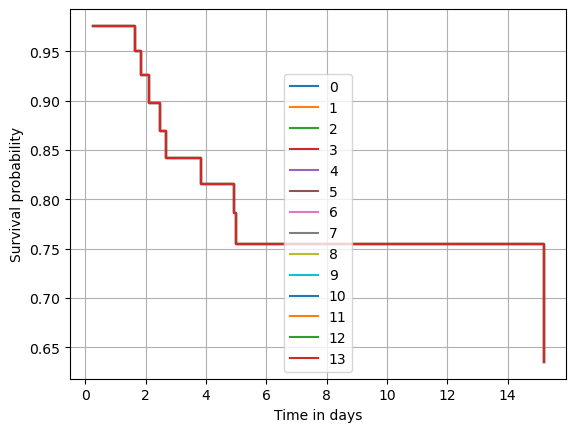

In [55]:

for i, s in enumerate(surv):
    plt.step(rsf.event_times_, s, where="post", label=str(i))
    plt.ylabel("Survival probability")
    plt.xlabel("Time in days")
    plt.legend()
    plt.grid(True)

## Group XXX (MPN = 6)

In [56]:
# 1.1 subset by group -- AAB 
# please give up the variable ws_ki67c

fliter = (df2["mpn_group"] == 3)
# group1 = df2[df.columns[~df.columns.isin(['ws_ki67c', 'n_surgery', 'N_radiotherapy', 'N_chemotherapy','GRADE', 'NODES', 'extent', 'ws_er', 'ws_pr', 'ws_basal', 'ws_ecadherin', 'ws_lvi', 'her2'])]]
group3 = df2[fliter].drop(['ws_ki67c', 'ws_ki67', 'n_surgery', 'N_radiotherapy', 'N_chemotherapy','GRADE', 'NODES', 'extent', 'ws_er', 'ws_pr', 'ws_basal', 'ws_ecadherin', 'ws_lvi', 'her2'], axis = 1)
group3 = group3.replace('.', np.nan)
group3.head(10)

,YDIAG,SIZE,nbcd,mpn,diaage,detect,nstime,cis2,ws_er0,ws_er1,...,grade2,grade3,extent0,extent1,extent9,NODES0,NODES1,her2_0,her2_1,mpn_group
1850,2000,58.0,0,6,92,9,0.7365,0.0,0,1,...,1,0,0,0,1,0,0,0,0,3.0
1882,1996,2.0,0,6,87,9,1.4237,0.0,1,0,...,1,0,0,1,0,1,0,1,0,3.0
1932,2000,50.0,0,6,91,9,2.1821,0.0,0,1,...,1,0,0,0,1,0,0,0,0,3.0
1980,2001,55.0,0,6,92,9,6.5024,0.0,0,1,...,1,0,0,0,1,0,0,0,0,3.0
2238,2001,56.0,1,6,90,9,6.7433,0.0,0,1,...,1,0,0,0,1,0,0,0,0,3.0
2337,1978,NaN,0,6,66,9,16.4600,NaN,0,0,...,0,1,0,0,0,1,0,0,0,3.0
2496,1996,-1.0,0,6,84,9,8.4846,NaN,0,0,...,0,0,0,0,1,0,0,0,0,3.0


In [57]:
# 2.data management

# 分feature(x), output(y)
from sksurv.datasets import get_x_y
group3_xxx=group3.dropna()
xdata, ydata = get_x_y(group3_xxx, attr_labels=['nbcd','nstime'], pos_label=True)
print(xdata)
print(ydata)

      YDIAG  SIZE  mpn  diaage  detect  cis2  ws_er0  ws_er1  ws_pr0  ws_pr1  \
1850   2000  58.0    6      92       9   0.0       0       1       0       1   
1882   1996   2.0    6      87       9   0.0       1       0       1       0   
1932   2000  50.0    6      91       9   0.0       0       1       0       1   
1980   2001  55.0    6      92       9   0.0       0       1       1       0   
2238   2001  56.0    6      90       9   0.0       0       1       1       0   

      ...  grade2  grade3  extent0  extent1  extent9  NODES0  NODES1  her2_0  \
1850  ...       1       0        0        0        1       0       0       0   
1882  ...       1       0        0        1        0       1       0       1   
1932  ...       1       0        0        0        1       0       0       0   
1980  ...       1       0        0        0        1       0       0       0   
2238  ...       1       0        0        0        1       0       0       0   

      her2_1  mpn_group  
1850       0

In [58]:
# 3.splitting the data

## random_state = seed
## test_size = test data %
random_state = 20221115
x_train, x_test, y_train, y_test = train_test_split(xdata,ydata, test_size=0.25, random_state=random_state)

In [60]:
# 4.Random survival forest training
# only trainning
rsf = RandomSurvivalForest(n_estimators=100,
                           min_samples_split=5,
                           min_samples_leaf=10,
                           n_jobs=-1,
                           random_state=random_state)
rsf.fit(x_train, y_train)

ValueError: all samples are censored